In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
df.shape

(767, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Create a dictionary to map the old column names to the new names
new_column_names = {
    '6': 'Pregnancies',
    '148': 'Glucose',
    '72': 'BloodPressure',
    '35': 'SkinThickness',
    '0': 'Insulin',
    '33.6': 'BMI',
    '0.627': 'DiabetesPedigree',
    '50': 'Age',
    '1': 'Outcome'
}

# Rename the columns using the rename() function
df = df.rename(columns=new_column_names)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [9]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']               # Target variable

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create a Naive Bayes classifier object
naive_bayes = GaussianNB()

In [12]:
# Train the classifier on the training data
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [13]:
# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

In [14]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7467532467532467


C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


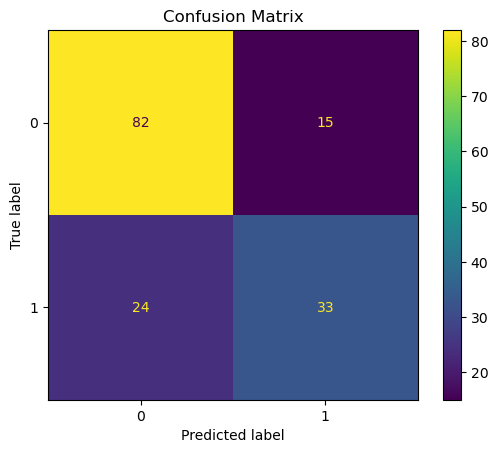

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Assuming you have already trained and tested the classifier (naive_bayes) as shown in the previous code

# Plot the confusion matrix
plot_confusion_matrix(naive_bayes, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

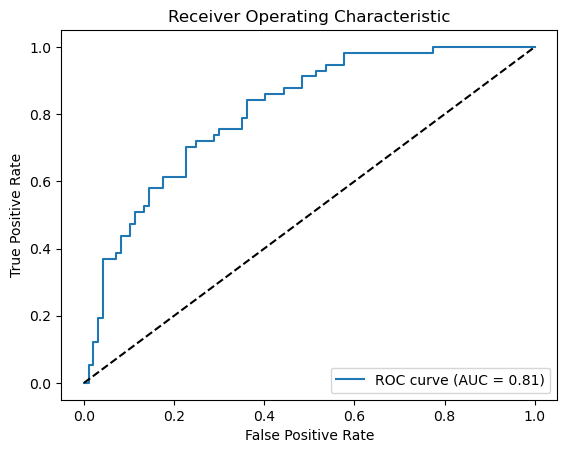

In [16]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_pred_prob = naive_bayes.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

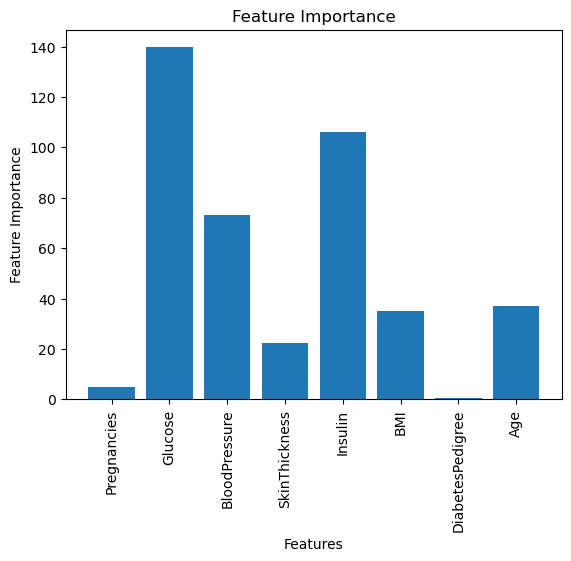

In [17]:
# Get the feature importances (or coefficients) of the Naive Bayes classifier
feature_importances = naive_bayes.theta_[1]  # Assuming class 1 represents the positive class

# Create a bar chart to visualize the feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()